In [720]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor

# Общие сведения

In [721]:
df = pd.read_csv('avocado.csv')

In [722]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Некоторые соответствующие столбцы в наборе данных:

- Date- Дата наблюдения
- AveragePrice- средняя цена одного авокадо
- type- обычные или органические
- year- год
- Region- город или район наблюдения
- Total Volume- Общее количество проданных авокадо
- 4046- Общее количество проданных авокадо с PLU 4046
- 4225- Общее количество проданных авокадо с PLU 4225
- 4770- Общее количество проданных авокадо с PLU 4770

In [723]:
df = df.drop('Unnamed: 0', axis=1)

Проверка на дубликаты:

In [724]:
df.duplicated().sum()

0

Проверка на пропуски:

In [725]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Пропуски и дубликаты в данных отсутсвуют. Из общей информации видно, что в столбце Date тип данных - объект. Есть также категориальные столбцы - регион и тип, которые в датесете представлены типом объект. Внесем необходимые изменения:

In [727]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y.%m.%d') #изменили тип столбца "Date"

for i in df.columns: #цикл для смены типа у котегориальных переменных
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  category      
 11  year          18249 non-null  int64         
 12  region        18249 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(1)
memory usage: 1.6 MB


Приведем названия колонок в соответсвующий вид:

In [728]:
df.columns = df.columns.str.lower()

In [729]:
df = df.rename(columns = {'averageprice':'average_price','total volume':'total_volume', 
                          'total bags':'total_bags', 'small bags':'small_bags',
                          'large bags':'large_bags', 'xlarge bags':'xlarge_bags'})
df.columns

Index(['date', 'average_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region'],
      dtype='object')

# Тип авокадо

In [730]:
typ=df['type'].value_counts().reset_index()
typ

,index,type
0,conventional,9126
1,organic,9123


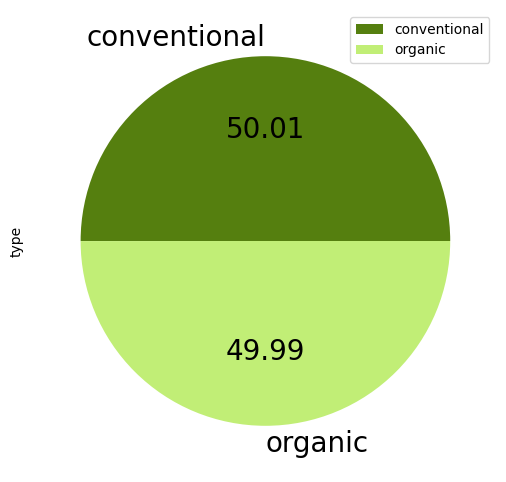

In [731]:
colors = ['#557F0F', '#C1EE76']
order = df['type'].value_counts().index
typ.plot.pie(y='type',labels = order, autopct="%.2f", fontsize=20, figsize=(6, 6), colors = colors)
plt.show()

Органических и обычных авокадо в датасете равное количество.

# Год

In [732]:
year=df['year'].value_counts().reset_index()
year['percent']=round(year['year']/year['year'].sum()*100, 2)
year.columns = ['year','count', 'percent']
year

,year,count,percent
0,2017,5722,31.36
1,2016,5616,30.77
2,2015,5615,30.77
3,2018,1296,7.10


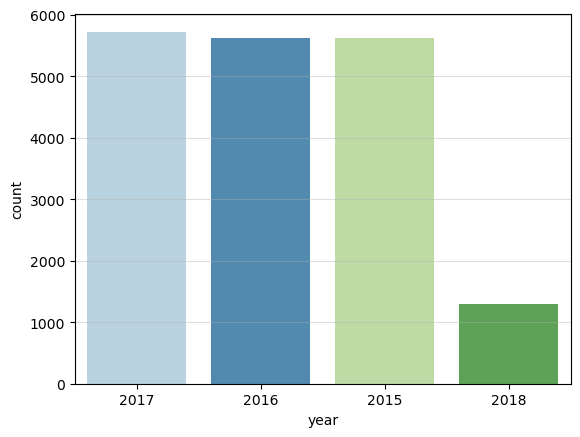

In [733]:
colors = sns.color_palette("Paired")
order = df['year'].value_counts().index
sns.countplot(x=df["year"],palette = colors, order = order, alpha = 0.85)
plt.grid(axis = 'y', alpha = 0.4)

Распределение по годам также практически одинаковое, за исключением 2018 года, так как данные за этот год могут быть не полными.

# Регионы

In [734]:
region=df['region'].value_counts().reset_index()
region['percent']=round(region['region']/region['region'].sum()*100, 2)
region.columns = ['region','count', 'percent']
region

,region,count,percent
0,Albany,338,1.85
1,Sacramento,338,1.85
2,Northeast,338,1.85
3,NorthernNewEngland,338,1.85
4,Orlando,338,1.85
5,Philadelphia,338,1.85
6,PhoenixTucson,338,1.85
7,Pittsburgh,338,1.85
8,Plains,338,1.85
9,Portland,338,1.85


Распределение по регионам равномерное.

Выделим топ-5 регионов, в которых авокадо продавались лучше всего:

In [735]:
av_con=df[df['type'] == 'conventional'].groupby('region')['total_volume'].sum().reset_index().sort_values(by ='total_volume', ascending = False)
av_con['total_volume']=av_con['total_volume']/1000000
av_con = av_con[av_con['region'] != 'TotalUS'].reset_index(drop=True).head(5)
av_con

,region,total_volume
0,West,1049.360590
1,California,1003.596841
2,SouthCentral,993.161155
3,Northeast,689.054813
4,Southeast,605.198753


In [736]:
av_org=df[df['type'] == 'organic'].groupby('region')['total_volume'].sum().reset_index().sort_values(by ='total_volume', ascending = False)
av_org['total_volume']=av_org['total_volume']/1000000
av_org = av_org[av_org['region'] != 'TotalUS'].reset_index(drop=True).head(5)
av_org

,region,total_volume
0,West,37.418566
1,California,25.384812
2,Northeast,24.226096
3,GreatLakes,22.074687
4,SouthCentral,18.118464


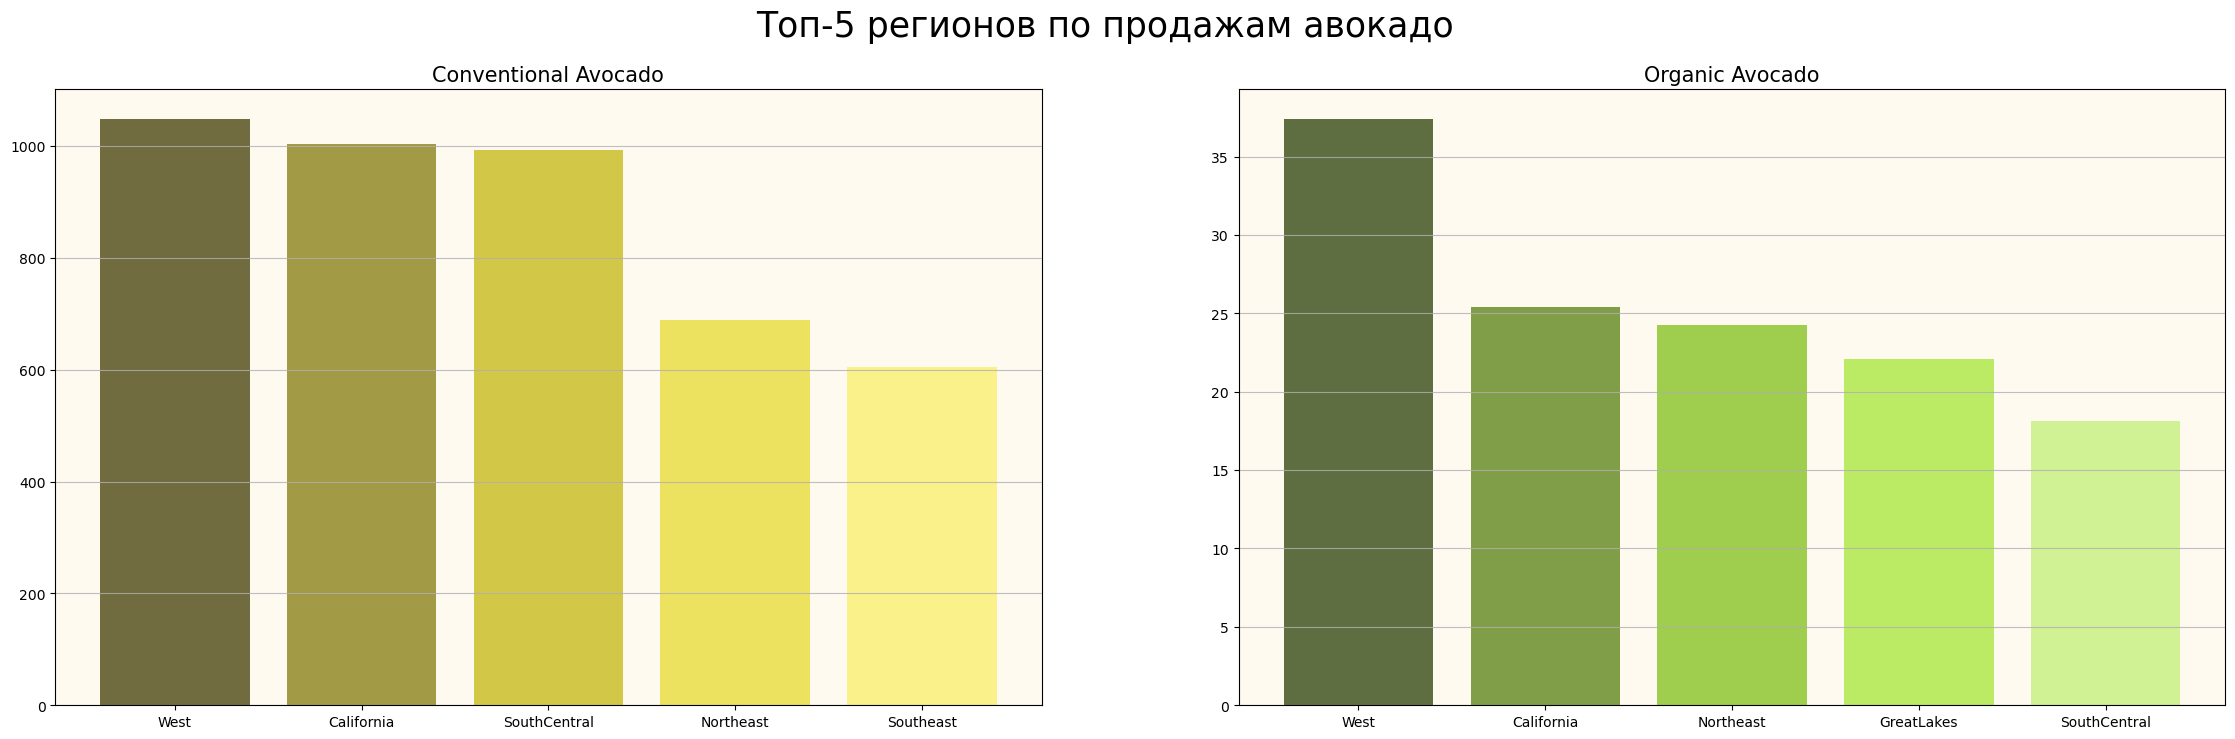

In [737]:
x1 = av_con['region']
y1 = av_con['total_volume']
x2 = av_org['region']
y2 = av_org['total_volume']

fig, axes = plt.subplots(1, 2)

axes[0].bar(x1, y1, color = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A'], alpha = 0.75)
axes[1].bar(x2, y2, color = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76'], alpha = 0.75)

axes[0].set_facecolor('floralwhite')
axes[1].set_facecolor('floralwhite')
axes[0].set_title('Conventional Avocado', fontsize=15)
axes[1].set_title('Organic Avocado', fontsize=15)
axes[0].grid(axis = 'y', alpha = 0.8)
axes[1].grid(axis = 'y', alpha = 0.8)
fig.set_figwidth(28)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure
fig.suptitle('Топ-5 регионов по продажам авокадо',  fontsize = 25)
plt.show()

- Западный регион оказался самым популярным как по продажам обычных, так и по продажам органических авокадо. Стоит отметить, что обычные авокадо покупали намного чаще - продано 1050 млн. авокадо. Органических продано - 37 млн. авокадо.
- На втором месте по популярности авокадо оказалась Калифорния, обычных авокадо продано - 1003 млн., органических - 25 млн.
- Третье место по обычным авокадо у Южно-Центрального региона, органические авокадо тут уже не так популярны, в рейтинге по ним этот регион на пятом месте.
- Северо-Восточный регион на четвертом месте по популярности обычных авокадо и на третьем по популярности органических авокадо.
- На пятом месте по продажам обычных авокадо Юго-Восточный регион. В топ-5 по популярности органических авокадо этот регион не попал.
- Так же в рейтинг по популярности обычных авокадо не попал регион Великих Озер, который находится на четвертом месте по популярности органических авокадо.

**Из представленных графиков и таблиц очень хорошо видно, что обычные авокадо пользуются намного большим спросом, чем органические.**

Выделим топ-5 регионов с самой низкой и самой высокой ценой на авокадо:

In [738]:
av_ch =df.groupby('region')['average_price'].median().reset_index().sort_values(by ='average_price')
av_ch = av_ch[av_ch['region'] != 'TotalUS'].reset_index(drop=True).head(5)
av_ch

,region,average_price
0,Houston,0.980
1,DallasFtWorth,1.040
2,SouthCentral,1.065
3,CincinnatiDayton,1.100
4,Nashville,1.105


In [739]:
av_ex =df.groupby('region')['average_price'].median().reset_index().sort_values(by ='average_price', ascending = False)
av_ex = av_ex[av_ex['region'] != 'TotalUS'].reset_index(drop=True).head(5)
av_ex

,region,average_price
0,HartfordSpringfield,1.800
1,NewYork,1.780
2,SanFrancisco,1.695
3,Northeast,1.640
4,Philadelphia,1.625


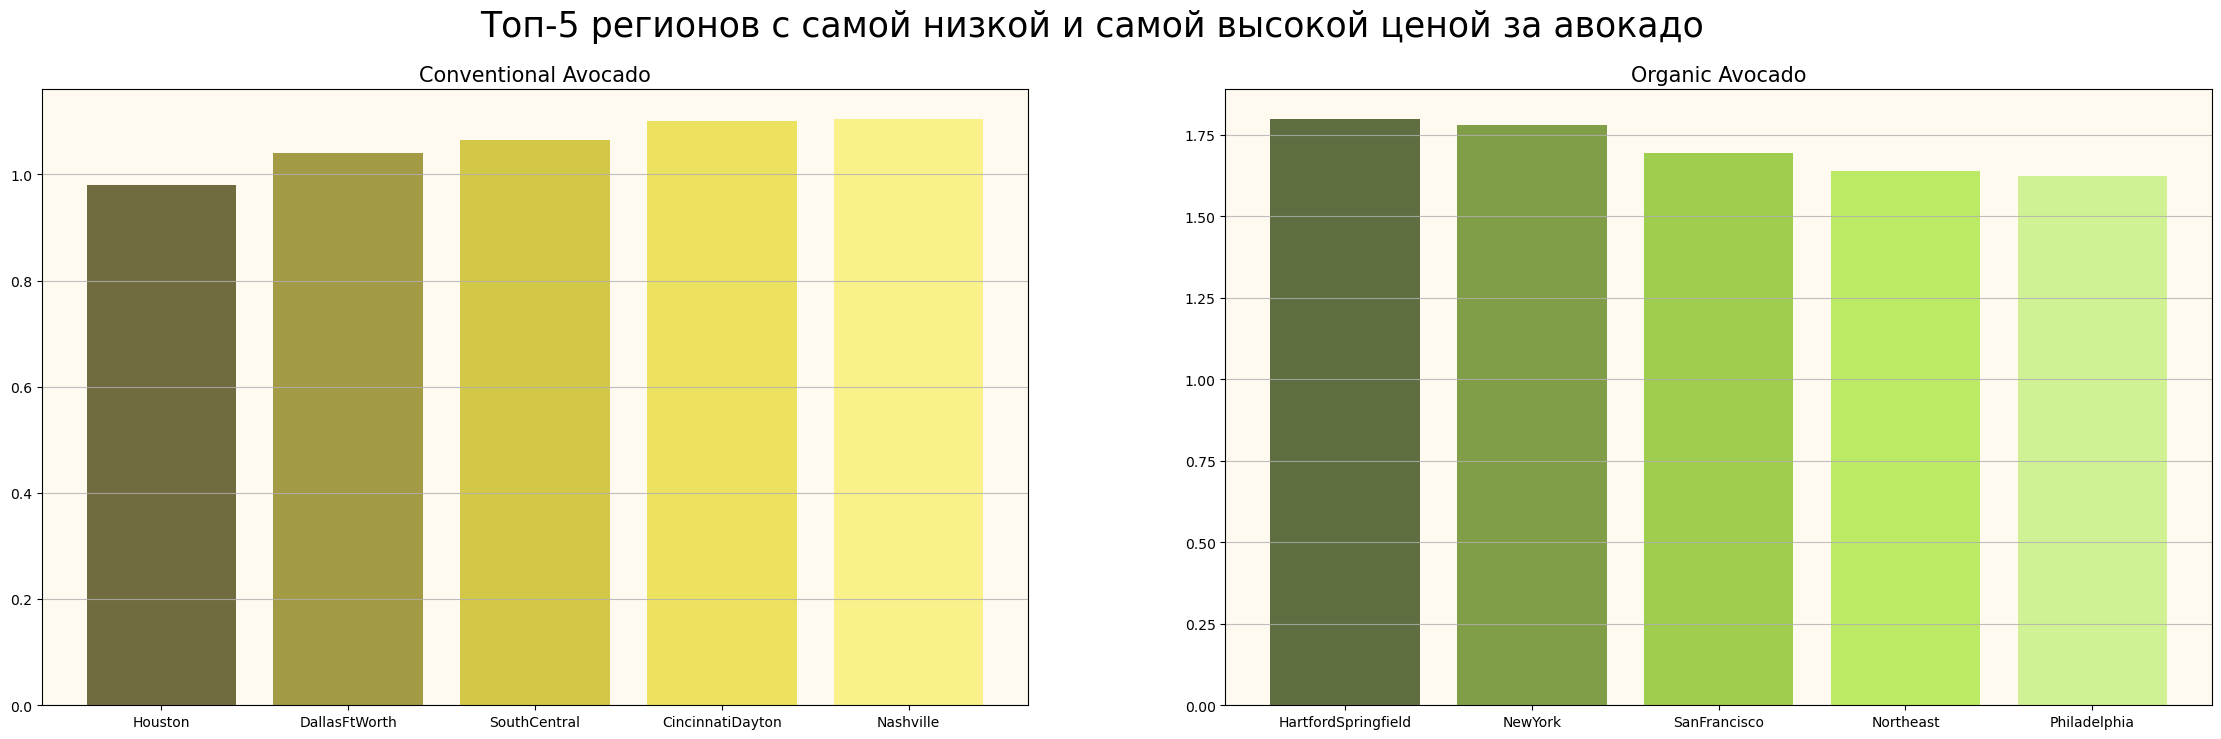

In [740]:
x1 = av_ch['region']
y1 = av_ch['average_price']
x2 = av_ex['region']
y2 = av_ex['average_price']

fig, axes = plt.subplots(1, 2)

axes[0].bar(x1, y1, color = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A'], alpha = 0.75)
axes[1].bar(x2, y2, color = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76'], alpha = 0.75)

axes[0].set_facecolor('floralwhite')
axes[1].set_facecolor('floralwhite')
axes[0].set_title('Conventional Avocado', fontsize=15)
axes[1].set_title('Organic Avocado', fontsize=15)
axes[0].grid(axis = 'y', alpha = 0.8)
axes[1].grid(axis = 'y', alpha = 0.8)
fig.set_figwidth(28)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure
fig.suptitle('Топ-5 регионов c самой низкой и самой высокой ценой за авокадо',  fontsize = 25)
plt.show()

Самые дорогие авокадо оказались в ХартФорд Спринкфилде, Нью-Йорке, Сан-Франциско, Северо-Восточном регионе и Филадельфии. Как мы уже знаем Северо-Восточный регион вошел в рейтинги по количеству проданных авокадо. Также среди регионов с самыми дешевыми авокадо оказался Южно-Центральный регион, который так же попал в топ-5 рейтинг регионов по продажам авокадо. Следовательно, влияние цены на спрос на данном этапе не выявлено.

# Визуализация данных

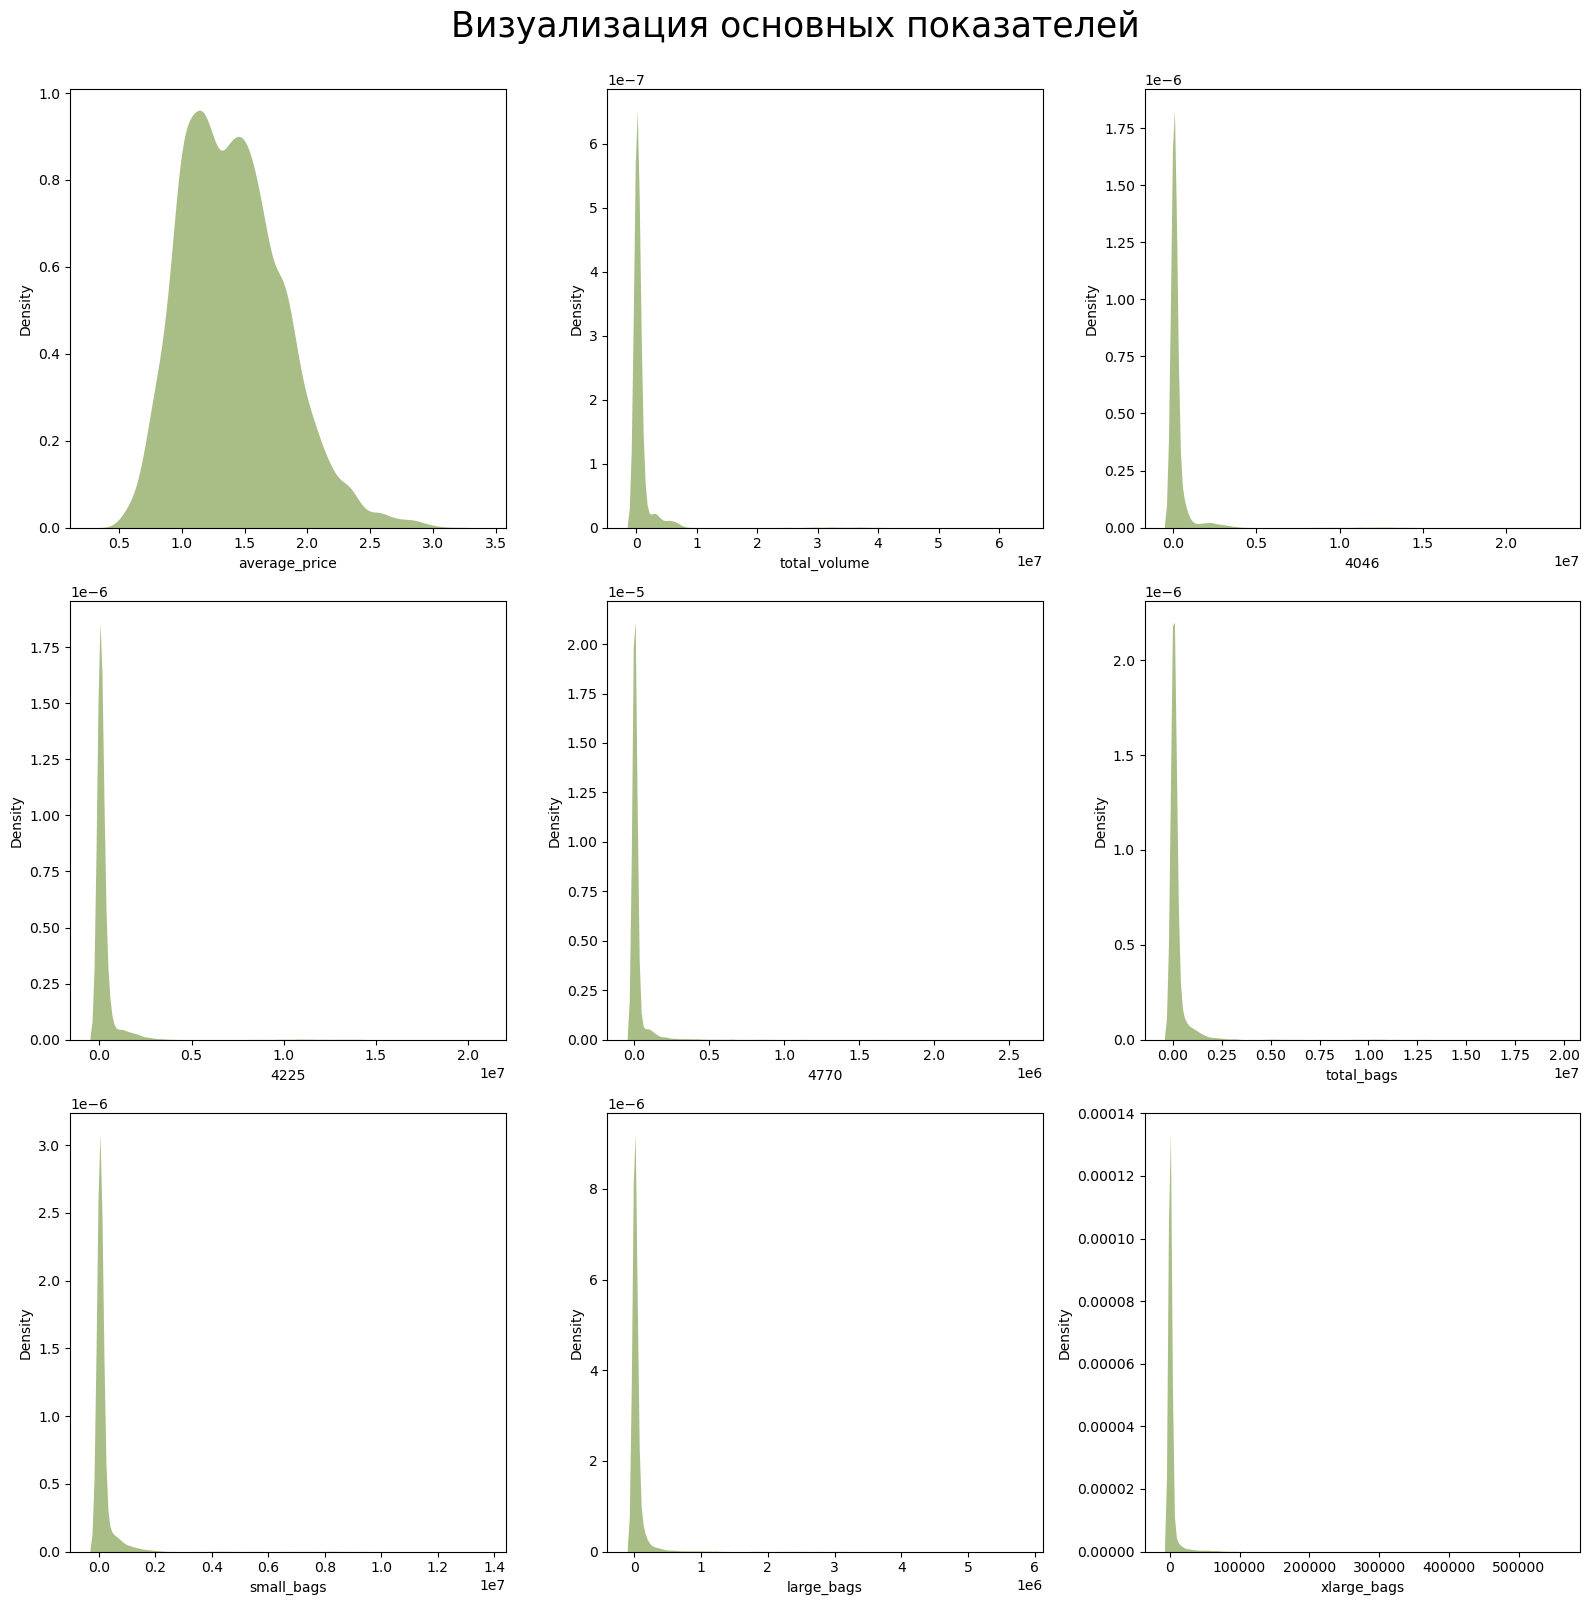

In [741]:
def dist_custom(data, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, dt in enumerate(columns_list):
        sns.kdeplot(data[dt], ax=axs[i], fill=True,  alpha=.5, linewidth=0, color = '#557F0F')
        
dist_custom(data=df, columns_list=df.columns.drop(['date','type','year','region']), rows=3, cols=3, suptitle='Визуализация основных показателей')
plt.tight_layout()

На диаграммах мы видим, что практически ни у одного показателя нет нормального распределения. Столбцы сильно смещены вправо. 

# Выбросы 

In [742]:
numeric_columns = df.columns.drop(['date','type','year','region'])

In [743]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i]
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], color = '#F2E880')
        axs[i].set_title(data)

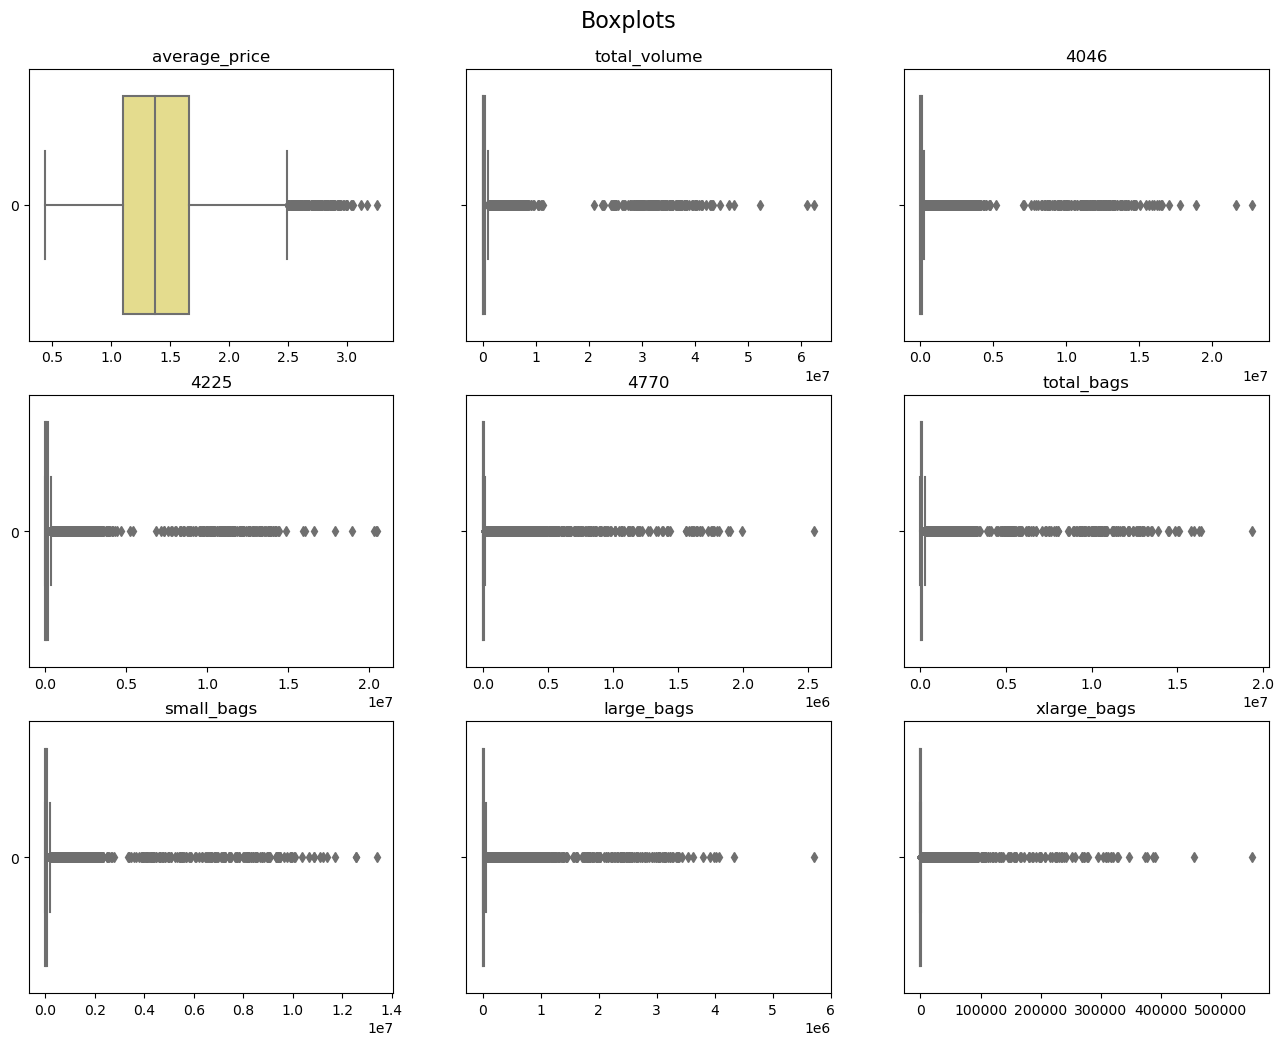

In [744]:
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots')

In [745]:
df.describe().T.style.set_properties(color="black", align="right")  

,count,mean,std,min,25%,50%,75%,max
average_price,18249.000000,1.405978,0.402677,0.440000,1.100000,1.370000,1.660000,3.250000
total_volume,18249.000000,850644.013009,3453545.355399,84.560000,10838.580000,107376.760000,432962.290000,62505646.520000
4046,18249.000000,293008.424531,1264989.081763,0.000000,854.070000,8645.300000,111020.200000,22743616.170000
4225,18249.000000,295154.568356,1204120.401135,0.000000,3008.780000,29061.020000,150206.860000,20470572.610000
4770,18249.000000,22839.735993,107464.068435,0.000000,0.000000,184.990000,6243.420000,2546439.110000
total_bags,18249.000000,239639.202060,986242.399216,0.000000,5088.640000,39743.830000,110783.370000,19373134.370000
small_bags,18249.000000,182194.686696,746178.514962,0.000000,2849.420000,26362.820000,83337.670000,13384586.800000
large_bags,18249.000000,54338.088145,243965.964547,0.000000,127.470000,2647.710000,22029.250000,5719096.610000
xlarge_bags,18249.000000,3106.426507,17692.894652,0.000000,0.000000,0.000000,132.500000,551693.650000
year,18249.000000,2016.147899,0.939938,2015.000000,2015.000000,2016.000000,2017.000000,2018.000000


Все параметры, за исключением года и цены на авокадо, имеют высокое стандартное отклонение. Это видно и на диаграммах boxplot, все параметры имееют экстремально большое количество выбросов.

# Поиск взаимосвязей

Посмотрим, как цена меняется в зависимости от года продаж и региона. Сначала посмотрим, как цена менялась в зависимости от года:

In [746]:
av_con_year=df[df['type'] == 'conventional'].groupby('year')['average_price'].mean().reset_index()
av_con_year

,year,average_price
0,2015,1.077963
1,2016,1.105595
2,2017,1.294888
3,2018,1.127886


In [747]:
av_org_year=df[df['type'] == 'organic'].groupby('year')['average_price'].mean().reset_index()
av_org_year

,year,average_price
0,2015,1.673324
1,2016,1.571684
2,2017,1.735521
3,2018,1.567176


In [748]:
av_year = av_con_year.merge(av_org_year, on = 'year', how = 'left')
av_year.columns = ['year', 'price_av_con', 'price_av_org']
av_year

,year,price_av_con,price_av_org
0,2015,1.077963,1.673324
1,2016,1.105595,1.571684
2,2017,1.294888,1.735521
3,2018,1.127886,1.567176


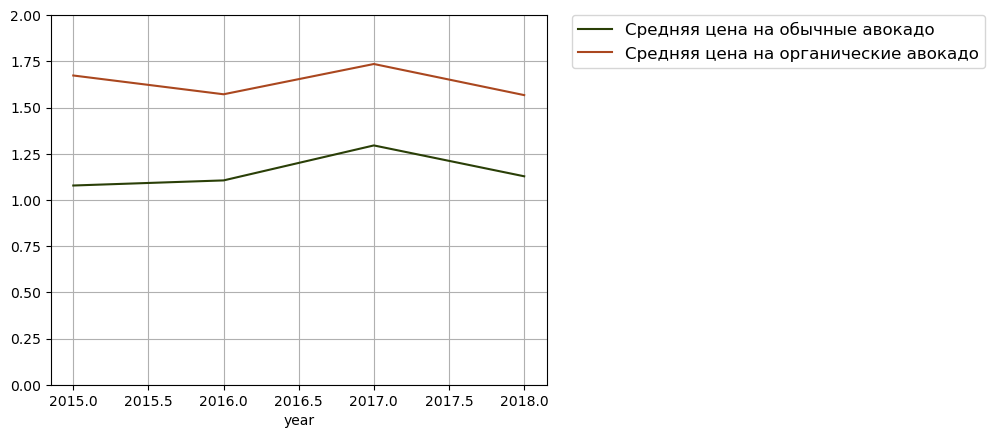

In [749]:
av_year.plot(x="year", ylim=(0,2), color=['#2A3F07', '#AA471F'], grid = True)
plt.legend(labels = ['Средняя цена на обычные авокадо','Средняя цена на органические авокадо'], 
           bbox_to_anchor=(1.05 ,1), loc='upper left', borderaxespad= 0, fontsize='12')
plt.show()

Как мы видим, цены на обычные авокадо ниже цен на органические авокадо. При этом цены на обычные авокадо росли с 2015 года по 2017 год. Дынные за 2018 год не полные, тем не менее в 2018 году цены на оба вида авокадо снижаются. Цены на органические авокадо в 2016 годы снизились по сравнению с 2015 годом, затем опять наблюдается рост до уровня цен 2015 года. Таким образом, самая высокая цена на авокадо была в 2017 году, самая низкая цена на органический авокадо - в 2016 году, на обычный авокадо - в 2015 году.

Посмотрим, как в течение всего периода изменялся спрос на авакадо:

In [750]:
s = df.groupby(['year','type'])['total_volume'].sum().reset_index()
s['total_volume'] = s['total_volume']/1000000
s

,year,type,total_volume
0,2015,conventional,4296.599236
1,2015,organic,88.869426
2,2016,conventional,4690.249813
3,2016,organic,130.640079
4,2017,conventional,4766.165793
5,2017,organic,168.139906
6,2018,conventional,1334.206069
7,2018,organic,48.532271


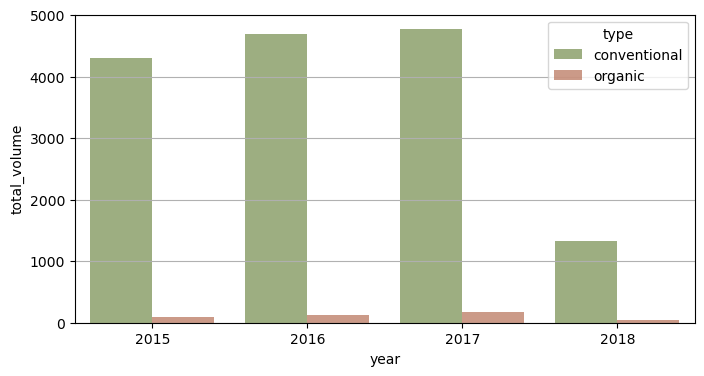

In [751]:
plt.figure(figsize=(8, 4)) 
sns.barplot(data=s, x="year", y="total_volume", hue="type", palette=['#6C8F32', '#C15C37'], alpha = 0.65)
plt.grid(axis = 'y', alpha = 0.99)
plt.show()

Продажи авокадо, как обычных, так и органических росли с 2015 по 2017 год, и опять мы видим, что обычные авокадо намного популярнее органических, их покупают в десятки раз больше. Таким образом, в 2017 году было продано больше всего авокадо обоих типов и в том же году самые высокие цены на этот продукт. 

Посмотрим, как влияет PLU на продажи авакадо:

In [752]:
plu=df.groupby('type')[['4046','4225', '4770']].sum()
plu/1000000

,4046,4225,4770
type,,,
conventional,5280.409917,5245.673340,414.373302
organic,66.700822,140.602378,2.429041


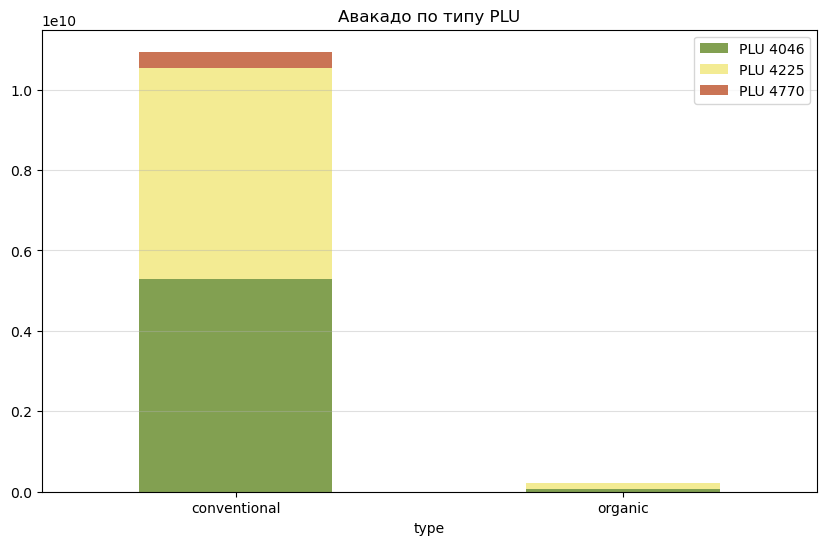

In [753]:
plu.plot(kind='bar', stacked = True, alpha = 0.85, color = ['#6C8F32', '#F2E880', '#C15C37'], rot=0, figsize=(10,6))
plt.title('Авакадо по типу PLU', fontsize = '12')
plt.grid(axis = 'y', alpha = 0.4)
plt.legend(labels = ['PLU 4046','PLU 4225', 'PLU 4770'], fontsize = '10')
plt.show()


Авокадо 4046 и 4225 продаются намного чаще, чем 4770, доля последних совсем маленькая. Для обычных авокадо доля 4046 и 4225 почти одинакова, для органических доля 4225 выше остальных.

In [754]:
bag=df.groupby('type')[['small_bags', 'large_bags', 'xlarge_bags']].sum()
bag/1000000

,small_bags,large_bags,xlarge_bags
type,,,
conventional,3164.183109,925.902960,56.678256
organic,160.687728,65.712811,0.010922


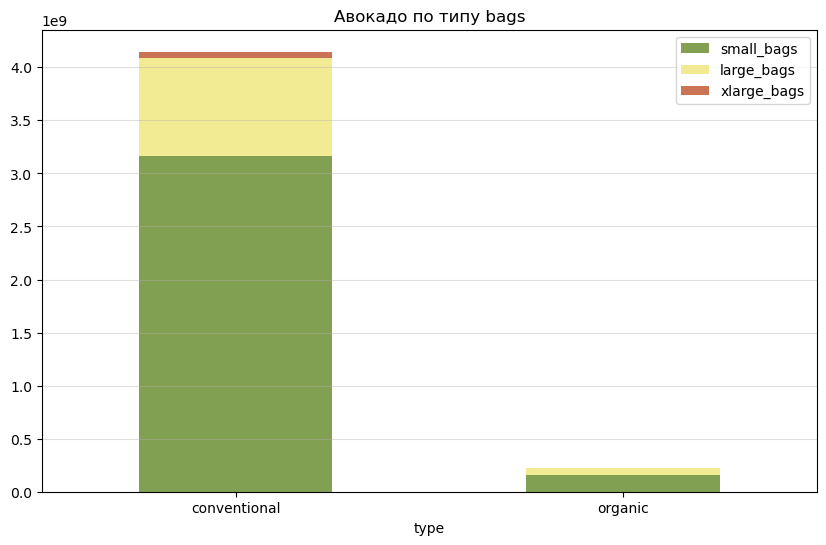

In [755]:
bag.plot(kind='bar', stacked = True, alpha = 0.85, color = ['#6C8F32', '#F2E880', '#C15C37'], rot=0, figsize=(10,6))
plt.title('Авокадо по типу bags', fontsize = '12')
plt.grid(axis = 'y', alpha = 0.4)
plt.legend(labels = ['small_bags', 'large_bags', 'xlarge_bags'], fontsize = '10')
plt.show()

Чаще остальных авокадо оказываются в маленьких корзинах, это характерно как для обычных, так и для органических авокадо. На втором месте большие корзины для обоих видов авокадо. Корзины XL не популярны, их доля очень мала в общем объеме продаж.

Теперь посмотрим, как дата продажи повлияла на цену:

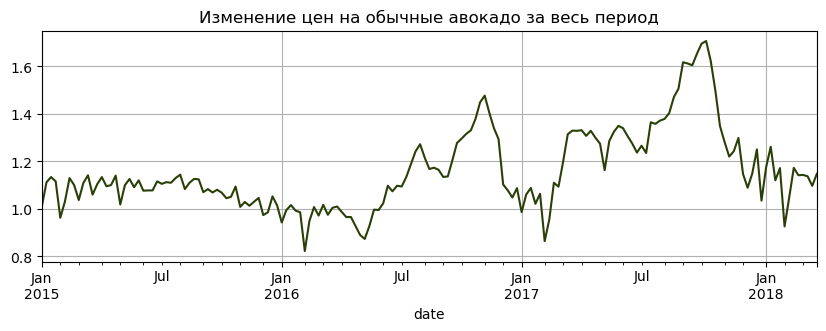

In [756]:
plt.figure(figsize=(10, 3)) 
df[df['type'] == 'conventional'].groupby(['date'])['average_price'].mean().plot(color=['#2A3F07'], grid = True)
plt.title('Изменение цен на обычные авокадо за весь период', fontsize = '12')
plt.show()

Зимой цены на обычные авокадо заметно снижаются. Особенно резкий провал в феврале каждого года, в этом месяце авокадо можно купить дешевле, чем за весь остальной период. После февраля начинается постепенный рост цен, в конце лета тенденция к росту только усиливается. Пик цен приходится на октябрь. После октября к зиме цены на авокадо начинают снижаться.

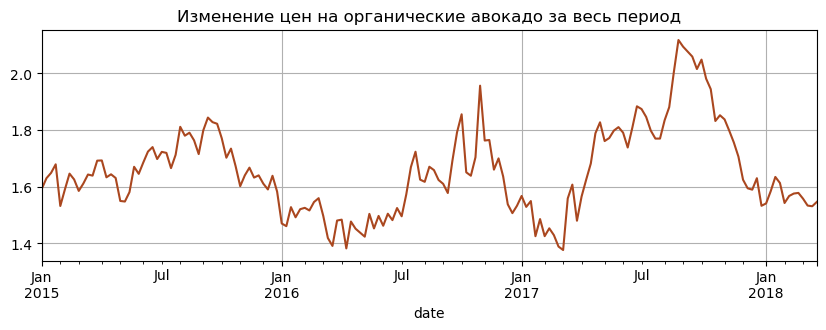

In [757]:
plt.figure(figsize=(10, 3)) 
df[df['type'] == 'organic'].groupby(['date'])['average_price'].mean().plot(color=['#AA471F'], grid = True)
plt.title('Изменение цен на органические авокадо за весь период', fontsize = '12')
plt.show()

Для органических авокадо ситуация такая же, как и для обычных. Снижение цен к зиме, пик цен в сентябре - октябре.

# Корреляция между параметрами

In [758]:
df_corr = df.corr()
df_corr

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
average_price,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
total_volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
total_bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
small_bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
large_bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
xlarge_bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


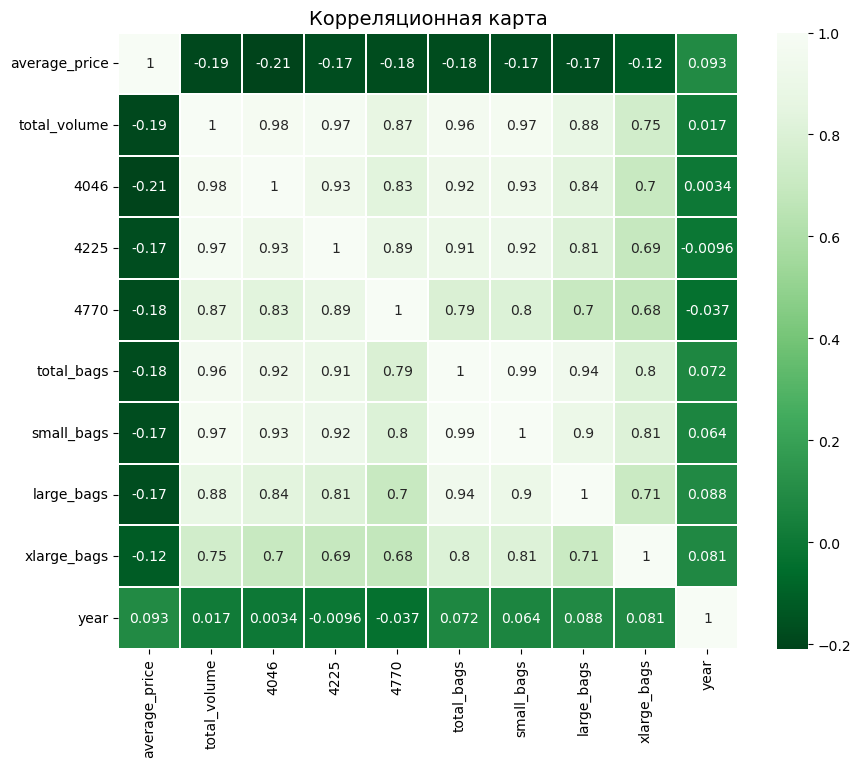

In [759]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_corr, annot = True, cmap = 'Greens_r', linewidths = 0.1)
plt.title('Корреляционная карта', fontsize = 14)
plt.show()

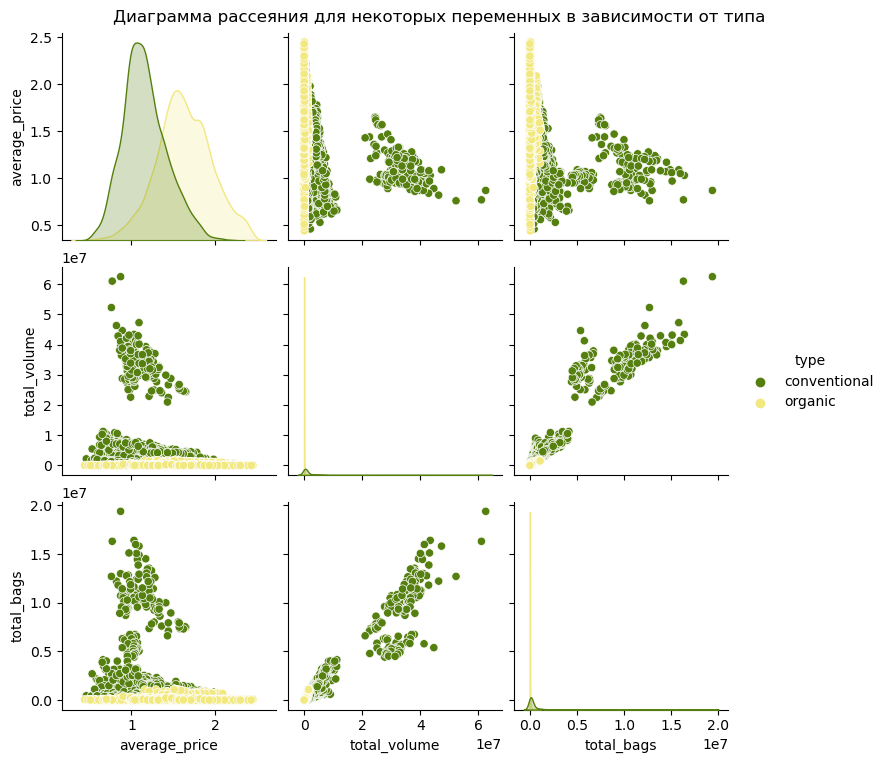

In [760]:
columns_for_research = ['average_price', 'total_volume','total_bags','type']
scatter = sns.pairplot(data=df_new[columns_for_research], hue="type", palette = ['#557F0F', '#F2E880'])
scatter.fig.suptitle("Диаграмма рассеяния для некоторых переменных в зависимости от типа", y=1.01, size=12)
plt.show()

# Модель машинного обучения

## Обучающая и тестовая выборки

In [761]:
train, test = train_test_split(df, train_size=0.6, random_state=42)

## Валидационная выборка

In [762]:
len(train)/len(df)

0.5999780809907392

In [763]:
val, test = train_test_split(test, train_size=0.5, random_state=42)

## Список фичей

In [764]:
train.columns

Index(['date', 'average_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region'],
      dtype='object')

In [765]:
x = ['date', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region']
cat_features = ['type', 'region']
y = ['average_price']

## Первый запуск CatBoost

In [766]:
! pip install catboost

In [767]:
from catboost import CatBoostRegressor

In [768]:
x = ['date', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region']
cat_features = ['type', 'region']
y = ['average_price']

In [769]:
paramemetrs = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
             'random_seed': 42,
            'verbose':100,
            'learning_rate': 0.5}

In [770]:
model = CatBoostRegressor(**paramemetrs)

In [771]:
model.fit(train[x], train[y], eval_set=(val[x], val[y]))

0:	learn: 0.1772183	test: 0.1793370	best: 0.1793370 (0)	total: 36.2ms	remaining: 36.2s
100:	learn: 0.0595674	test: 0.0679208	best: 0.0679208 (100)	total: 3.81s	remaining: 33.9s
200:	learn: 0.0479821	test: 0.0621395	best: 0.0621395 (200)	total: 8.6s	remaining: 34.2s
300:	learn: 0.0409317	test: 0.0599309	best: 0.0599205 (299)	total: 14.9s	remaining: 34.7s
400:	learn: 0.0364856	test: 0.0588001	best: 0.0588001 (400)	total: 20.8s	remaining: 31.1s
500:	learn: 0.0329200	test: 0.0579704	best: 0.0579704 (500)	total: 24.5s	remaining: 24.4s
600:	learn: 0.0299895	test: 0.0573817	best: 0.0573817 (600)	total: 28s	remaining: 18.6s
700:	learn: 0.0274321	test: 0.0568247	best: 0.0567883 (696)	total: 31.4s	remaining: 13.4s
800:	learn: 0.0254580	test: 0.0567452	best: 0.0566846 (795)	total: 35s	remaining: 8.7s
900:	learn: 0.0237278	test: 0.0565071	best: 0.0564957 (897)	total: 38.5s	remaining: 4.23s
999:	learn: 0.0221470	test: 0.0563492	best: 0.0563399 (998)	total: 41.8s	remaining: 0us

bestTest = 0.0563398

In [772]:
def error(y_true, y_pred): #определение средней абсолютной ошибки и ее процентной соотношение.
    print(mean_absolute_error(y_true, y_pred))
    print(mean_absolute_percentage_error(y_true, y_pred))

In [773]:
test['price_pred_all'] = model.predict(test[x])

In [774]:
error(test['average_price'],test['price_pred_all'])

0.07802572241798963
0.05665030530322646


In [775]:
test.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,price_pred_all
14384,2016-11-06,2.02,1894.26,14.17,965.27,0.00,914.82,26.67,888.15,0.00,organic,2016,Spokane,1.825134
6551,2017-05-07,1.61,369499.67,6754.65,251849.93,310.83,110584.26,109324.82,974.72,284.72,conventional,2017,HartfordSpringfield,1.702475
12320,2016-07-17,1.58,7940.49,342.54,3579.56,1379.56,2638.83,2625.50,13.33,0.00,organic,2016,Charlotte,1.619034
7816,2017-06-25,1.05,586241.71,212203.54,131972.03,19457.18,222608.96,220632.65,197.32,1778.99,conventional,2017,SanDiego,1.149321
7563,2017-04-02,1.12,672306.68,152601.88,137424.85,20885.20,361394.75,359313.65,1923.63,157.47,conventional,2017,Portland,1.091999


# Анализ модели

## Анализ ошибок

In [776]:
test['error'] = test['average_price'] - test['price_pred_all']

In [777]:
test.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,price_pred_all,error
14384,2016-11-06,2.02,1894.26,14.17,965.27,0.00,914.82,26.67,888.15,0.00,organic,2016,Spokane,1.825134,0.194866
6551,2017-05-07,1.61,369499.67,6754.65,251849.93,310.83,110584.26,109324.82,974.72,284.72,conventional,2017,HartfordSpringfield,1.702475,-0.092475
12320,2016-07-17,1.58,7940.49,342.54,3579.56,1379.56,2638.83,2625.50,13.33,0.00,organic,2016,Charlotte,1.619034,-0.039034
7816,2017-06-25,1.05,586241.71,212203.54,131972.03,19457.18,222608.96,220632.65,197.32,1778.99,conventional,2017,SanDiego,1.149321,-0.099321
7563,2017-04-02,1.12,672306.68,152601.88,137424.85,20885.20,361394.75,359313.65,1923.63,157.47,conventional,2017,Portland,1.091999,0.028001


<AxesSubplot:>

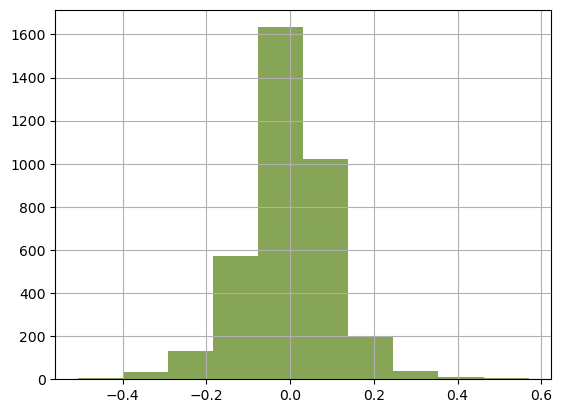

In [778]:
test['error'].hist(color = '#557F0F', alpha = 0.7)

In [779]:
test['error'].mean()

-0.004067534340285307

Средняя ошибка модели = -0,004. Распределение ошибок на гистограмме нормальное, в основном это значение близкое к 0 или 0. Чаще модел  прибавляла цену к реальной, чем ее занижала. 

## Абсолютная ошибка

In [780]:
test['error_abs'] = abs(test['error'])

In [781]:
test.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,price_pred_all,error,error_abs
14384,2016-11-06,2.02,1894.26,14.17,965.27,0.00,914.82,26.67,888.15,0.00,organic,2016,Spokane,1.825134,0.194866,0.194866
6551,2017-05-07,1.61,369499.67,6754.65,251849.93,310.83,110584.26,109324.82,974.72,284.72,conventional,2017,HartfordSpringfield,1.702475,-0.092475,0.092475
12320,2016-07-17,1.58,7940.49,342.54,3579.56,1379.56,2638.83,2625.50,13.33,0.00,organic,2016,Charlotte,1.619034,-0.039034,0.039034
7816,2017-06-25,1.05,586241.71,212203.54,131972.03,19457.18,222608.96,220632.65,197.32,1778.99,conventional,2017,SanDiego,1.149321,-0.099321,0.099321
7563,2017-04-02,1.12,672306.68,152601.88,137424.85,20885.20,361394.75,359313.65,1923.63,157.47,conventional,2017,Portland,1.091999,0.028001,0.028001


<AxesSubplot:>

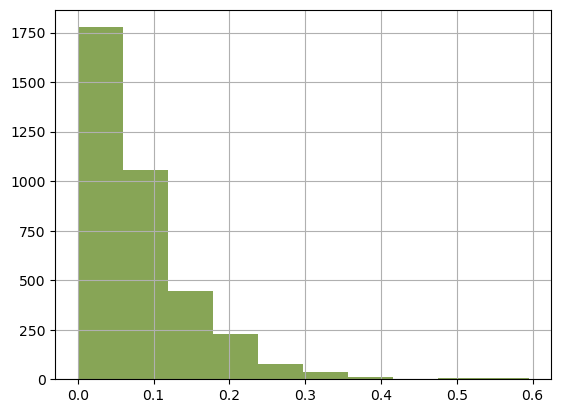

In [782]:
test_x['error_abs'].hist(color = '#557F0F', alpha = 0.7)

In [783]:
test['error_abs'].describe()

count    3650.000000
mean        0.078026
std         0.071885
min         0.000002
25%         0.026370
50%         0.057466
75%         0.108378
max         0.569849
Name: error_abs, dtype: float64

Максимальная ошибка составила 0,57. Посмотрим на ТОП-10 ошибок, которые допустила модель:

In [784]:
test.sort_values('error_abs', ascending=False).head(10)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,price_pred_all,error,error_abs
14523,2016-03-06,2.09,2090.95,0.00,225.45,0.00,1865.50,520.25,1345.25,0.0,organic,2016,Syracuse,1.520151,0.569849,0.569849
17696,2018-01-07,1.08,28741.11,22.16,6254.59,225.17,22239.19,22132.06,107.13,0.0,organic,2018,Charlotte,1.587572,-0.507572,0.507572
12235,2016-03-06,2.13,3751.88,0.00,182.17,0.00,3569.71,386.67,3183.04,0.0,organic,2016,BuffaloRochester,1.628713,0.501287,0.501287
10056,2015-02-08,2.37,5223.36,49.13,4531.32,15.93,626.98,626.98,0.00,0.0,organic,2015,HartfordSpringfield,1.871417,0.498583,0.498583
16024,2017-10-15,2.62,1100.10,24.83,384.79,0.00,690.48,657.77,32.71,0.0,organic,2017,MiamiFtLauderdale,2.129590,0.490410,0.490410
14162,2016-02-14,2.37,21276.09,1014.44,20230.54,0.00,31.11,31.11,0.00,0.0,organic,2016,SanFrancisco,1.895459,0.474541,0.474541
12374,2016-07-03,1.50,15807.19,85.18,13515.35,0.00,2206.66,2206.66,0.00,0.0,organic,2016,Chicago,1.974490,-0.474490,0.474490
14073,2016-10-30,2.74,8933.54,1854.17,6533.70,0.00,545.67,545.67,0.00,0.0,organic,2016,SanDiego,2.272277,0.467723,0.467723
13813,2016-10-30,2.55,7136.88,1910.88,4597.68,0.83,627.49,172.25,455.24,0.0,organic,2016,Portland,2.098928,0.451072,0.451072
10086,2015-07-12,1.17,11741.87,11397.65,277.55,0.00,66.67,66.67,0.00,0.0,organic,2015,Houston,1.614578,-0.444578,0.444578


В топ-10 попали только органические авокадо, и только те дни, в которых было продано незначительное количество авокадо. Регионы лидеры продаж не попали в топ-10 ошибок. Из этого можно сделать вывод, что, чем больше продано авокадо, тем реже модель ошибется.

## Анализ абсолютной ошибки

In [785]:
test['group_price'] = pd.qcut(test['average_price'],5)

In [786]:
group_price = test.groupby('group_price')[['error_abs', 'error']].agg(['count','mean'])

In [787]:
group_price.columns = ['_'.join(col) for col in group_price.columns.values]

In [788]:
group_price

,error_abs_count,error_abs_mean,error_count,error_mean
group_price,,,,
"(0.489, 1.06]",749,0.060642,749,-0.021090
"(1.06, 1.27]",740,0.067419,740,-0.016515
"(1.27, 1.5]",731,0.079757,731,-0.012084
"(1.5, 1.76]",711,0.078048,711,-0.002374
"(1.76, 2.99]",719,0.105268,719,0.032953


In [789]:
group_price = group_price.drop('error_count', axis=1)

In [790]:
group_price['mean_error_diff'] = group_price['error_abs_mean']-test['error_abs'].mean()

In [791]:
group_price['mean'] = test['error_abs'].mean()

In [792]:
group_price

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean
group_price,,,,,
"(0.489, 1.06]",749,0.060642,-0.021090,-0.017383,0.078026
"(1.06, 1.27]",740,0.067419,-0.016515,-0.010607,0.078026
"(1.27, 1.5]",731,0.079757,-0.012084,0.001732,0.078026
"(1.5, 1.76]",711,0.078048,-0.002374,0.000022,0.078026
"(1.76, 2.99]",719,0.105268,0.032953,0.027242,0.078026


In [793]:
cm = sns.light_palette("red", as_cmap=True)
group_price.style.background_gradient(cmap=cm, subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean
group_price,,,,,
"(0.489, 1.06]",749,0.060642,-0.021090,-0.017383,0.078026
"(1.06, 1.27]",740,0.067419,-0.016515,-0.010607,0.078026
"(1.27, 1.5]",731,0.079757,-0.012084,0.001732,0.078026
"(1.5, 1.76]",711,0.078048,-0.002374,0.000022,0.078026
"(1.76, 2.99]",719,0.105268,0.032953,0.027242,0.078026


Из таблицы видно, что модель ошиблась сильнее на авокадо с самой высокой ценой (именно в группе с самой высокой ценой чаще встречаются органические авакадо) 

## Анализ абсолютной ошибки относительно других переменных

In [794]:
error_abs = test.groupby('year')[['error_abs', 'error']].agg(['count','mean'])

In [795]:
error_abs.columns = ['_'.join(col) for col in error_abs.columns.values]

In [796]:
error_abs = error_abs.drop('error_count', axis=1)

In [797]:
error_abs['mean_error_diff'] = error_abs['error_abs_mean']-test['error_abs'].mean()
error_abs['mean'] = test['error_abs'].mean()

In [798]:
error_abs.style.background_gradient(cmap=cm, subset=['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean
year,,,,,
2015,1087,0.069910,-0.007715,-0.008116,0.078026
2016,1133,0.077559,-0.001415,-0.000467,0.078026
2017,1164,0.085460,-0.002580,0.007434,0.078026
2018,266,0.080651,-0.006970,0.002625,0.078026


И опять в таблице мы видим, что модель ошиблась критичнее в 2017 году, когда цены на авокадо были выше, чем в другие периоды.

In [799]:
def print_error (col):
    error_abs = test.groupby(col)[['error_abs', 'error']].agg(['count','mean'])
    error_abs.columns = ['_'.join(col) for col in error_abs.columns.values]
    error_abs = error_abs.drop('error_count', axis=1)
    error_abs['mean_error_diff'] = error_abs['error_abs_mean']-test['error_abs'].mean()
    error_abs['mean'] = test['error_abs'].mean()
    display(error_abs.style.background_gradient(cmap=cm, subset=['mean_error_diff']))

In [800]:
print_error('region')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean
region,,,,,
Albany,58,0.097848,-0.000127,0.019823,0.078026
Atlanta,76,0.073961,0.007220,-0.004065,0.078026
BaltimoreWashington,76,0.078013,-0.005990,-0.000013,0.078026
Boise,69,0.093788,-0.003062,0.015762,0.078026
Boston,70,0.063280,-0.019325,-0.014745,0.078026
BuffaloRochester,74,0.094982,-0.013864,0.016956,0.078026
California,66,0.066903,-0.002747,-0.011123,0.078026
Charlotte,75,0.082006,-0.020559,0.003981,0.078026
Chicago,56,0.099111,-0.024985,0.021085,0.078026


Из преведенной выше таблице мы видим, в каких регионах модель ошиблась чаще. В западном регионе, который был лидером по продажам авокадо, модель ошиблась реже.

In [801]:
test['total_bags_group'] = pd.qcut(test['total_bags'],5)

In [802]:
print_error('total_bags_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean
total_bags_group,,,,,
"(-0.001, 3232.114]",730,0.100611,-0.008027,0.022585,0.078026
"(3232.114, 14145.73]",730,0.101057,-0.011038,0.023032,0.078026
"(14145.73, 59969.224]",730,0.074485,-0.002624,-0.003541,0.078026
"(59969.224, 142705.796]",730,0.058371,0.000508,-0.019655,0.078026
"(142705.796, 16298296.29]",730,0.055604,0.000843,-0.022421,0.078026


И снова, если в корзине маленькое количество авокадо, то модель ошибается чаще.

In [803]:
print_error('type')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean
type,,,,,
conventional,1774,0.058393,0.000329,-0.019633,0.078026
organic,1876,0.096591,-0.008225,0.018565,0.078026


Основная доля ошибок у органических авокадо. У обычных авакадо цена занижена от реальной

In [804]:
test['total_volume_group'] = pd.qcut(test['total_volume'],5)

In [805]:
print_error('total_volume_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean
total_volume_group,,,,,
"(84.559, 8238.616]",730,0.095891,-0.003155,0.017866,0.078026
"(8238.616, 35545.868]",730,0.107002,-0.015007,0.028976,0.078026
"(35545.868, 178378.348]",730,0.074522,-0.000724,-0.003504,0.078026
"(178378.348, 563384.666]",730,0.058694,-0.001557,-0.019332,0.078026
"(563384.666, 61034457.1]",730,0.054020,0.000107,-0.024006,0.078026


In [806]:
test['xlarge_bags_group'] = pd.qcut(test['xlarge_bags'],5, duplicates='drop')

In [807]:
print_error('xlarge_bags_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean
xlarge_bags_group,,,,,
"(-0.001, 374.072]",2920,0.083687,-0.005417,0.005661,0.078026
"(374.072, 272508.29]",730,0.055381,0.001331,-0.022645,0.078026


In [808]:
test['4046_group'] = pd.qcut(test['4046'],5)

In [809]:
print_error('4046_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean
4046_group,,,,,
"(-0.001, 400.358]",730,0.101604,-0.004716,0.023578,0.078026
"(400.358, 2978.958]",730,0.094596,-0.012775,0.016570,0.078026
"(2978.958, 25340.89]",730,0.077768,0.003009,-0.000258,0.078026
"(25340.89, 139237.928]",730,0.061211,-0.004498,-0.016815,0.078026
"(139237.928, 22743616.17]",730,0.054950,-0.001359,-0.023076,0.078026


## Основная фича

In [810]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,date,27.988391
1,region,16.121316
2,type,11.167053
3,4046,7.948456
4,4225,7.763566
5,large_bags,7.605821
6,total_bags,7.214133
7,total_volume,5.391446
8,small_bags,4.262132
9,4770,3.146465


Основной параметр, орпеделяющий цену на авокадо - это дата его продажи, на втором месте - регион, на третьем - тип авокадо. 

# ВЫВОД

Проанализированы цены на авокадо и построена модель машинного обучения на основе catboost. В процессе анализа мы выяснили, что для обычных авокадо модель предсказывает цену точнее, чем для органических. Также на цену влияет сезонность авокадо и регион, в котором их продают. Не всегда низкая цена является гарантией высокой популярности авокадо. Тем не менее обычные авокадо дешевле органических и спрос на них превышает в несколько десятков раз спрос на органические авокадо. 